In [ ]:
# prompt: mount my google drive and i want to access a file named apnea_data_final1.csv from google drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'My Drive/path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/apnea_data_final1.csv'
try:
  df = pd.read_csv(file_path)
  print("File loaded successfully!")
  # Now you can work with the DataFrame 'df'
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!
  Subject_ID                                        RR_Interval  \
0        C16  989.37316336\n 1030.8404531 \n 1057.03876147\n...   
1        C16  1044.62643699\n 1066.05235988\n 1040.84661428\...   
2        C16  1043.90359913\n 1059.2861619 \n 1078.98322795\...   
3        C16  1099.71673231\n 1095.53505003\n 1079.96985994\...   
4        C16  1104.62454665\n 1082.97769547\n 1094.6330581 \...   

                                                SpO2  Label  
0  94.99961852\n 94.99961852\n 94.99961852\n ...\...      0  
1  95.98992905\n 95.98992905\n 95.98992905\n ...\...      0  
2  95.98992905\n 95.98992905\n 95.98992905\n ...\...      0  
3  96.99855039\n 96.99855039\n 96.99855039\n ...\...      0  
4  96.99855039\n 96.99855039\n 96.99855039\n ...\...      0  


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/drive/My Drive/apnea_data_final1.csv"  # Updated path
df = pd.read_csv(file_path)

# Function to clean and convert string sequences into numerical lists
def convert_to_list(series):
    def process_string(x):
        if isinstance(x, str):
            try:
                # Remove unwanted characters and split by newline
                cleaned_values = x.replace("...", "").strip().split("\n")
                return np.array([float(val) for val in cleaned_values if val.strip() != ""])
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        return np.nan

    return series.apply(process_string)

# Convert and clean RR_Interval and SpO2 columns
df["RR_Interval"] = convert_to_list(df["RR_Interval"])
df["SpO2"] = convert_to_list(df["SpO2"])

# Drop rows with NaN values
df.dropna(inplace=True)

# Convert the processed numerical arrays back into string format for storage
df["RR_Interval"] = df["RR_Interval"].apply(lambda x: "\n".join(map(str, x)))
df["SpO2"] = df["SpO2"].apply(lambda x: "\n".join(map(str, x)))

# Save the processed dataset with the same structure
processed_file_path = "/content/drive/My Drive/apnea_processed.csv"  # Updated path
df.to_csv(processed_file_path, index=False)

print("Preprocessing complete! Processed file saved at:", processed_file_path)


Preprocessing complete! Processed file saved at: /content/drive/My Drive/apnea_processed.csv


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path1="/content/drive/My Drive/apnea_processed.csv"
df1=pd.read_csv(file_path1)
df1.head()


Mounted at /content/drive


,Subject_ID,RR_Interval,SpO2,Label
0,C16,989.37316336\n1030.8404531\n1057.03876147\n106...,94.99961852\n94.99961852\n94.99961852\n95.9899...,0
1,C16,1044.62643699\n1066.05235988\n1040.84661428\n1...,95.98992905\n95.98992905\n95.98992905\n96.9985...,0
2,C16,1043.90359913\n1059.2861619\n1078.98322795\n10...,95.98992905\n95.98992905\n95.98992905\n95.9899...,0
3,C16,1099.71673231\n1095.53505003\n1079.96985994\n1...,96.99855039\n96.99855039\n96.99855039\n97.9888...,0
4,C16,1104.62454665\n1082.97769547\n1094.6330581\n10...,96.99855039\n96.99855039\n96.99855039\n97.9888...,0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
file_path = "/content/drive/My Drive/apnea_processed.csv"
df = pd.read_csv(file_path)

# Function to convert string sequences into numerical arrays
def convert_to_array(series):
    return series.apply(lambda x: np.array([float(i) for i in x.strip().split("\n")]) if isinstance(x, str) else np.nan)

# Convert RR_Interval and SpO2 from string to numerical arrays
df["RR_Interval"] = convert_to_array(df["RR_Interval"])
df["SpO2"] = convert_to_array(df["SpO2"])

# Drop rows with NaN values
df.dropna(inplace=True)

# Find the max sequence length
max_len = max(df["RR_Interval"].apply(len).max(), df["SpO2"].apply(len).max())

# Pad or truncate RR_Interval and SpO2 sequences to fixed length
df["RR_Interval"] = df["RR_Interval"].apply(lambda x: x[:max_len] if len(x) > max_len else np.pad(x, (0, max_len - len(x)), 'constant'))
df["SpO2"] = df["SpO2"].apply(lambda x: x[:max_len] if len(x) > max_len else np.pad(x, (0, max_len - len(x)), 'constant'))

# Normalize RR and SpO2 signals
scaler = StandardScaler()
df["RR_Interval"] = df["RR_Interval"].apply(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten())
df["SpO2"] = df["SpO2"].apply(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten())

# Convert to numpy arrays
X_rr = np.stack(df["RR_Interval"].values)
X_spo2 = np.stack(df["SpO2"].values)

# Stack RR and SpO2 to create a 2-channel input
X = np.stack((X_rr, X_spo2), axis=2)  # Shape: (samples, timesteps, features)

# Labels
y = df["Label"].values

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure correct data type for TensorFlow
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save Model
model.save("/content/drive/My Drive/lstm_apnea_model.h5")

print("Model training complete and saved!")

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 403s 477ms/step - accuracy: 0.7654 - loss: 0.5526 - val_accuracy: 0.7676 - val_loss: 0.5437
Epoch 2/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 425s 509ms/step - accuracy: 0.7731 - loss: 0.5370 - val_accuracy: 0.7678 - val_loss: 0.5422
Epoch 3/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 420s 483ms/step - accuracy: 0.7620 - loss: 0.5498 - val_accuracy: 0.7678 - val_loss: 0.5413
Epoch 4/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 421s 505ms/step - accuracy: 0.7706 - loss: 0.5382 - val_accuracy: 0.7678 - val_loss: 0.5383
Epoch 5/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 439s 502ms/step - accuracy: 0.7643 - loss: 0.5426 - val_accuracy: 0.7678 - val_loss: 0.5324
Epoch 6/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 406s 486ms/step - accuracy: 0.7680 - loss: 0.5385 - val_accuracy: 0.7678 - val_loss: 0.5367
Epoch 7/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 461s 509ms/step - accuracy: 0.7690 - loss: 0.5376 - val_accuracy: 0.7678 - val_loss: 0.5379
Epoch 8/20
835/835 ━━━━━━━━━━━━━━━━━━━━ 441s 507ms/step - accuracy: 0.7683 -

Model training complete and saved!
209/209 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step
Accuracy: 0.7677554689841175
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      5124
           1       0.00      0.00      0.00      1550

    accuracy                           0.77      6674
   macro avg       0.38      0.50      0.43      6674
weighted avg       0.59      0.77      0.67      6674



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


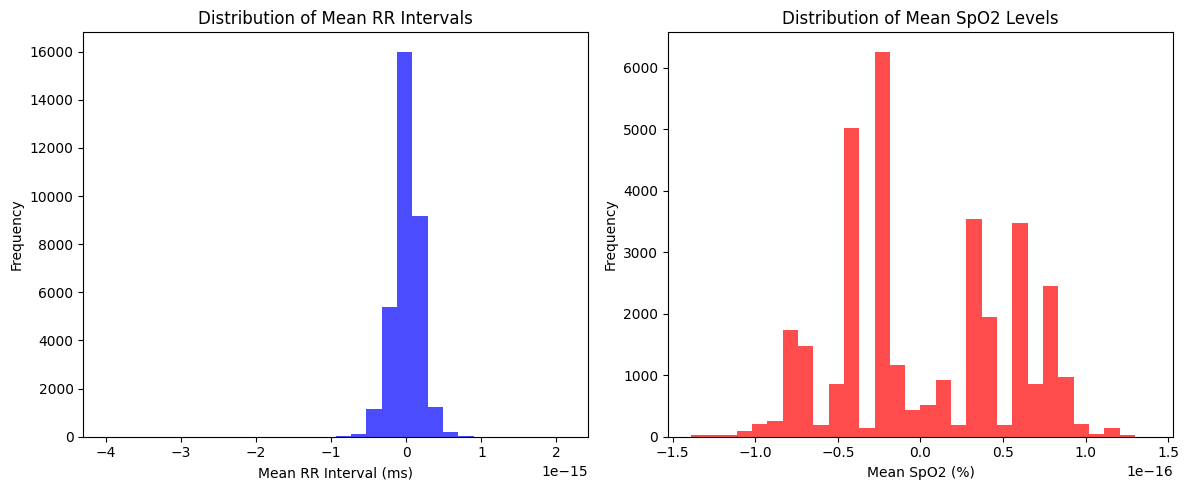

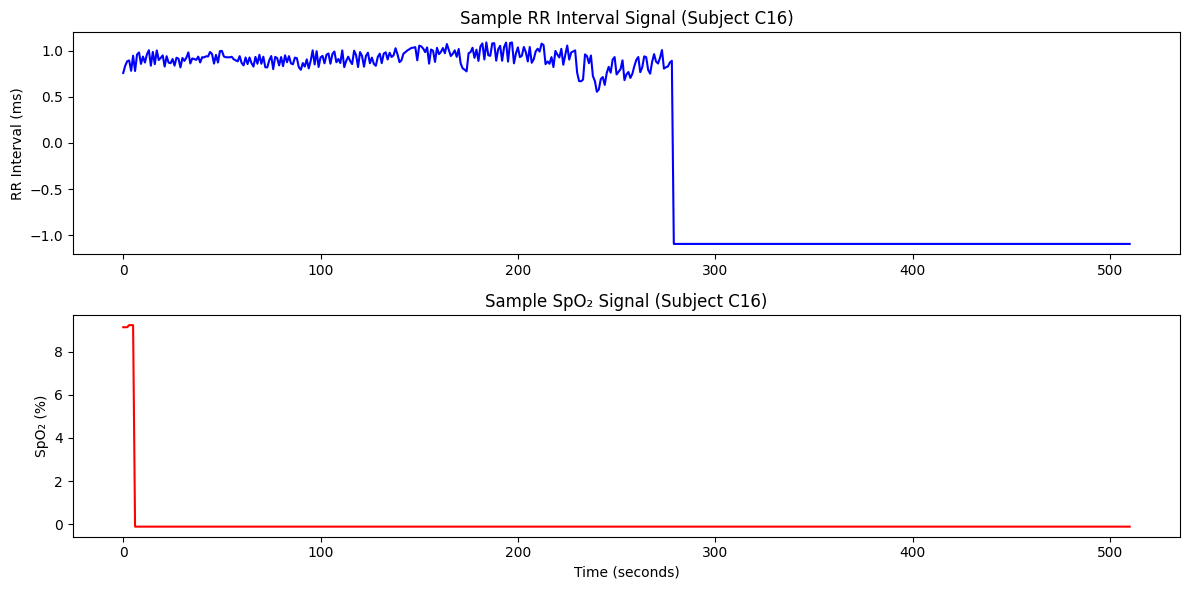

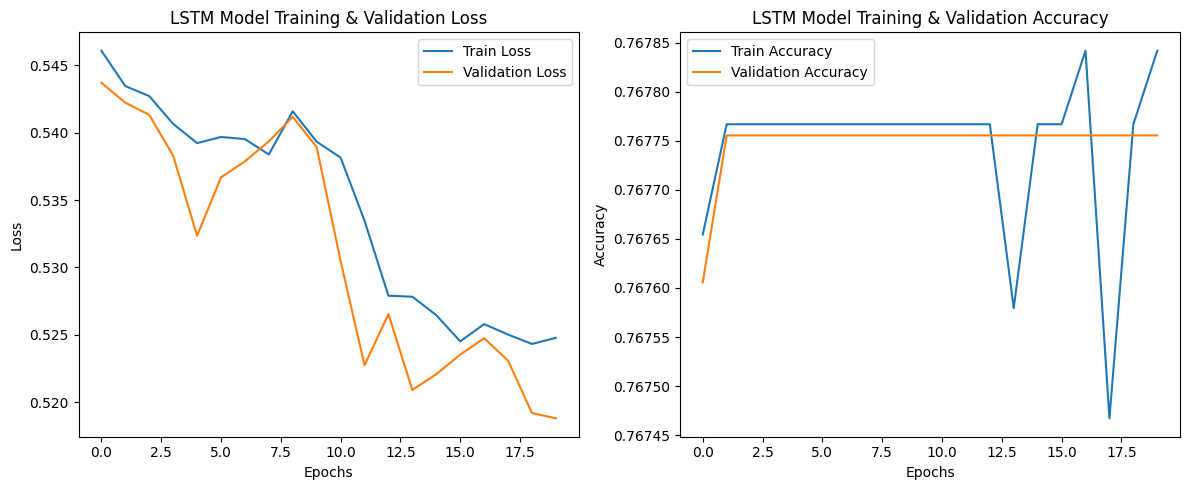

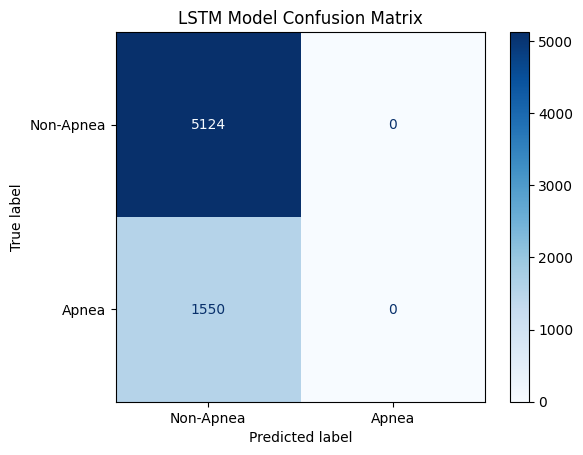

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ 1. Plot Distribution of RR Interval and SpO2 Values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RR Interval distribution
axes[0].hist(df["RR_Interval"].apply(np.mean), bins=30, color='blue', alpha=0.7, label='RR Mean')
axes[0].set_title("Distribution of Mean RR Intervals")
axes[0].set_xlabel("Mean RR Interval (ms)")
axes[0].set_ylabel("Frequency")

# SpO2 distribution
axes[1].hist(df["SpO2"].apply(np.mean), bins=30, color='red', alpha=0.7, label='SpO2 Mean')
axes[1].set_title("Distribution of Mean SpO2 Levels")
axes[1].set_xlabel("Mean SpO2 (%)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ✅ 2. Sample Time-Series Data for RR & SpO2
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Select a sample
sample_idx = 0  # Change index to visualize different subjects
sample_rr = df["RR_Interval"].iloc[sample_idx]
sample_spo2 = df["SpO2"].iloc[sample_idx]

axes[0].plot(sample_rr, color='blue')
axes[0].set_title(f"Sample RR Interval Signal (Subject {df['Subject_ID'].iloc[sample_idx]})")
axes[0].set_ylabel("RR Interval (ms)")

axes[1].plot(sample_spo2, color='red')
axes[1].set_title(f"Sample SpO₂ Signal (Subject {df['Subject_ID'].iloc[sample_idx]})")
axes[1].set_ylabel("SpO₂ (%)")

plt.xlabel("Time (seconds)")
plt.tight_layout()
plt.show()



# ✅ 4. Plot Training Loss & Accuracy (from LSTM Model History)
plt.figure(figsize=(12, 5))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Training & Validation Loss")
plt.legend()

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Model Training & Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# ✅ 5. Confusion Matrix (LSTM Model Predictions)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Apnea", "Apnea"])
disp.plot(cmap="Blues")
plt.title("LSTM Model Confusion Matrix")
plt.show()


In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save Model
model.save("/content/drive/My Drive/lstm_apnea_model.h5")

print("Model training complete and saved!")

# Model Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 414s 489ms/step - accuracy: 0.7651 - loss: 0.5519 - val_accuracy: 0.7678 - val_loss: 0.5427
Epoch 2/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 426s 510ms/step - accuracy: 0.7688 - loss: 0.5427 - val_accuracy: 0.7678 - val_loss: 0.5411
Epoch 3/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 424s 508ms/step - accuracy: 0.7631 - loss: 0.5476 - val_accuracy: 0.7678 - val_loss: 0.5419
Epoch 4/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 441s 507ms/step - accuracy: 0.7682 - loss: 0.5415 - val_accuracy: 0.7678 - val_loss: 0.5389
Epoch 5/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 443s 509ms/step - accuracy: 0.7638 - loss: 0.5471 - val_accuracy: 0.7678 - val_loss: 0.5419
Epoch 6/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 443s 510ms/step - accuracy: 0.7714 - loss: 0.5386 - val_accuracy: 0.7678 - val_loss: 0.5407
Epoch 7/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 443s 511ms/step - accuracy: 0.7682 - loss: 0.5416 - val_accuracy: 0.7678 - val_loss: 0.5389
Epoch 8/50
835/835 ━━━━━━━━━━━━━━━━━━━━ 441s 510ms/step - accuracy: 0.7725 -